Toyota Exploratory Data Analysis
In this notebook , toyota data set has been explored to know more about data

#### Import required libraries and packages

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read a csv file as pandas DataFrame

In [220]:
df = pd.read_csv("toyota.csv")

display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0
...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3


#### Check for missing values, data types of the columns

In [221]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


None

#### Count the number of unique values present in the 'year' column

In [222]:
year_count = df['year'].value_counts()
display(year_count)

2017    2019
2019    1286
2018    1015
2016     997
2015     525
2014     352
2013     204
2020     128
2012      42
2011      40
2009      29
2007      20
2008      19
2010      18
2005      12
2006      11
2004       7
2003       6
2002       4
2000       1
1999       1
2001       1
1998       1
Name: year, dtype: int64

#### Count the number of unique values present in the 'model' column

In [223]:
model_count = df['model'].value_counts()
display(model_count)

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

#### Count the number of unique values present in the 'transmission' column

In [224]:
transmission_count = df['transmission'].value_counts()
display(transmission_count)

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

#### Count the number of unique values present in the 'fuelType' column

In [225]:
fuelType_count = df['fuelType'].value_counts()
display(fuelType_count)

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

In [226]:
engineSize_count = df['engineSize'].value_counts()
display(engineSize_count)


1.0    2059
1.5    1423
1.8    1289
1.3     601
2.0     398
1.2     303
2.5     249
1.6     169
2.4      70
2.2      58
1.4      40
2.8      36
3.0      35
0.0       6
4.5       1
4.2       1
Name: engineSize, dtype: int64

#### Find the percentage of unique values present in the 'fuelType' column

In [227]:
fuelType_count = df['fuelType'].value_counts()
# print(type(fuelType_count))

fuelType_count = pd.DataFrame(fuelType_count)
# display(fuelType_count)

fuelType_count = fuelType_count.reset_index()
# display(fuelType_count)

fuelType_count = fuelType_count.rename(columns={'index':'fuel_type', 'fuelType':'No_of_cars'})
# display(fuelType_count)

# print(fuelType_count['No_of_cars'].sum())

fuelType_count['% of cars'] = np.round(((fuelType_count['No_of_cars']/fuelType_count['No_of_cars'].sum())*100), 2)
display(fuelType_count)

# print(type(fuelType_count))

,fuel_type,No_of_cars,% of cars
0,Petrol,4087,60.66
1,Hybrid,2043,30.32
2,Diesel,503,7.47
3,Other,105,1.56


#### Create a Barplot for the 'fuelType' column

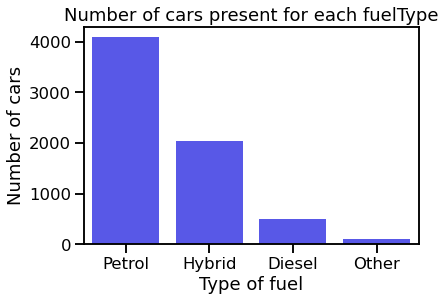

In [228]:
sns.barplot(x='fuel_type', y='No_of_cars', data=fuelType_count, color='blue', alpha=0.75)
plt.title("Number of cars present for each fuelType")
plt.xlabel("Type of fuel")
plt.ylabel("Number of cars")
# plt.grid()
plt.show()

#### Find the percentage of unique values present in the 'transmission' column

In [229]:
transmission_count = df['transmission'].value_counts()
# print(type(transmission_count))

transmission_count = pd.DataFrame(transmission_count)
# display(transmission_count)

transmission_count = transmission_count.reset_index()
# display(transmission_count)

transmission_count = transmission_count.rename(columns={'index':'transmission', 'transmission':'No_of_cars'})
# display(transmission_count)

# print(transmission_count['No_of_cars'].sum())

transmission_count['% of cars'] = np.round(((transmission_count['No_of_cars']/transmission_count['No_of_cars'].sum())*100), 2)
display(transmission_count)

# print(type(transmission_count))

,transmission,No_of_cars,% of cars
0,Manual,3826,56.78
1,Automatic,2657,39.43
2,Semi-Auto,254,3.77
3,Other,1,0.01


#### Create a Barplot for the 'transmission' column

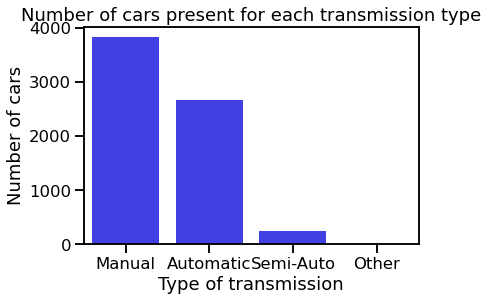

In [230]:
sns.barplot(x='transmission', y='No_of_cars', data=transmission_count, color='blue', alpha=0.85)
plt.title("Number of cars present for each transmission type")
plt.xlabel("Type of transmission")
plt.ylabel("Number of cars")
plt.show()

#### Find the percentage of unique values present in the 'model' column

In [231]:
model_count = df['model'].value_counts()
# print(type(model_count))

model_count = pd.DataFrame(model_count)
display(model_count)

model_count = model_count.reset_index()
display(model_count)

model_count = model_count.rename(columns={'index':'model', 'model':'No_of_cars'})
# display(model_count)

# print(model_count['No_of_cars'].sum())

model_count['% of cars'] = np.round(((model_count['No_of_cars']/model_count['No_of_cars'].sum())*100), 2)
display(model_count)

# print(type(model_count))

,model
Yaris,2122
Aygo,1961
Auris,712
C-HR,479
RAV4,473
Corolla,267
Prius,232
Avensis,115
Verso,114
Hilux,86


,index,model
0,Yaris,2122
1,Aygo,1961
2,Auris,712
3,C-HR,479
4,RAV4,473
5,Corolla,267
6,Prius,232
7,Avensis,115
8,Verso,114
9,Hilux,86


,model,No_of_cars,% of cars
0,Yaris,2122,31.49
1,Aygo,1961,29.10
2,Auris,712,10.57
3,C-HR,479,7.11
4,RAV4,473,7.02
5,Corolla,267,3.96
6,Prius,232,3.44
7,Avensis,115,1.71
8,Verso,114,1.69
9,Hilux,86,1.28


#### Create a Barplot for the 'model' column

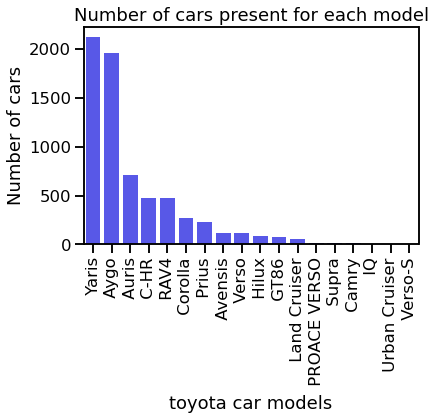

In [232]:
sns.barplot(x='model', y='No_of_cars', data=model_count, color='blue', alpha=0.75)
plt.title("Number of cars present for each model")
plt.xlabel("toyota car models")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)
plt.show()

In [233]:
engineSize_count = df['engineSize'].value_counts()
print(type(engineSize_count))

engineSize_count = pd.DataFrame(engineSize_count)
display(engineSize_count)

engineSize_count = engineSize_count.reset_index()
display(engineSize_count)

engineSize_count = engineSize_count.rename(columns={'index':'engineSize', 'engineSize':'No_of_cars'})
# display(model_count)

# print(model_count['No_of_cars'].sum())

engineSize_count['% of cars'] = np.round(((engineSize_count['No_of_cars']/engineSize_count['No_of_cars'].sum())*100), 2)
display(engineSize_count)

print(engineSize_count['engineSize'])



<class 'pandas.core.series.Series'>


,engineSize
1.0,2059
1.5,1423
1.8,1289
1.3,601
2.0,398
1.2,303
2.5,249
1.6,169
2.4,70
2.2,58


,index,engineSize
0,1.0,2059
1,1.5,1423
2,1.8,1289
3,1.3,601
4,2.0,398
5,1.2,303
6,2.5,249
7,1.6,169
8,2.4,70
9,2.2,58


,engineSize,No_of_cars,% of cars
0,1.0,2059,30.56
1,1.5,1423,21.12
2,1.8,1289,19.13
3,1.3,601,8.92
4,2.0,398,5.91
5,1.2,303,4.50
6,2.5,249,3.70
7,1.6,169,2.51
8,2.4,70,1.04
9,2.2,58,0.86


0     1.0
1     1.5
2     1.8
3     1.3
4     2.0
5     1.2
6     2.5
7     1.6
8     2.4
9     2.2
10    1.4
11    2.8
12    3.0
13    0.0
14    4.5
15    4.2
Name: engineSize, dtype: float64


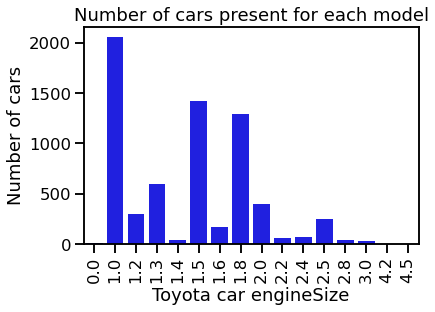

In [234]:
sns.barplot(x='engineSize', y='No_of_cars', data=engineSize_count, color='blue', alpha=1)
plt.title("Number of cars present for each model")
plt.xlabel("Toyota car engineSize")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)
plt.show()

#### Can you plot the above barplots side by side?

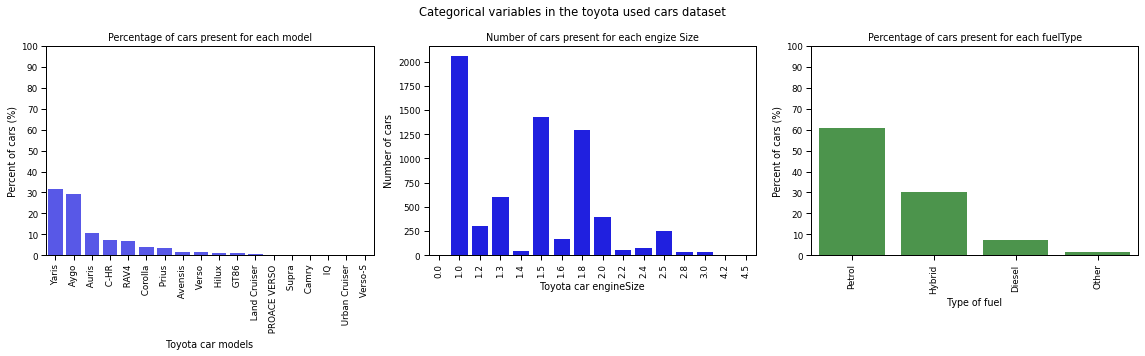

In [235]:
sns.set_context('paper')

plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.barplot(x='model', y='% of cars', data=model_count, color='blue', alpha=0.75)
plt.title("Percentage of cars present for each model")
plt.xlabel("Toyota car models")
plt.ylabel("Percent of cars (%)")
plt.xticks(rotation=90)
plt.yticks(np.arange(0,101,10).tolist())

plt.subplot(1,3,2)
sns.barplot(x='engineSize', y='No_of_cars', data=engineSize_count, color='blue', alpha=1)
plt.title("Number of cars present for each engize Size")
plt.xlabel("Toyota car engineSize")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.barplot(x='fuel_type', y='% of cars', data=fuelType_count, color='green', alpha=0.75)
plt.title("Percentage of cars present for each fuelType")
plt.xlabel("Type of fuel")
plt.ylabel("Percent of cars (%)")
plt.xticks(rotation=90)
plt.yticks(np.arange(0,101,10).tolist())

plt.suptitle("Categorical variables in the toyota used cars dataset")
plt.tight_layout()
plt.show()

#### Create a function to find the number of observations for unique value in a column of a DataFrame

In [236]:
def unique_val_count(data, column):
    df_count = df[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

In [237]:
model_count = unique_val_count(df, 'model')
year_count = unique_val_count(df, 'year')
transmission_count = unique_val_count(df, 'transmission')
fuelType_count = unique_val_count(df, 'fuelType')
engineSize_count= unique_val_count(df, 'engineSize')

In [238]:
# sort the year_count DataFrame based on 'year'
year_count = year_count.sort_values(by='year')
# year_count

#### Create a function to show the number of observations for each unique value in a column using a barplot

In [239]:
def barplot(data, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # write a title for your plot
    plt.title("Percent of car present for each " + column_x)
    
    # write proper lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

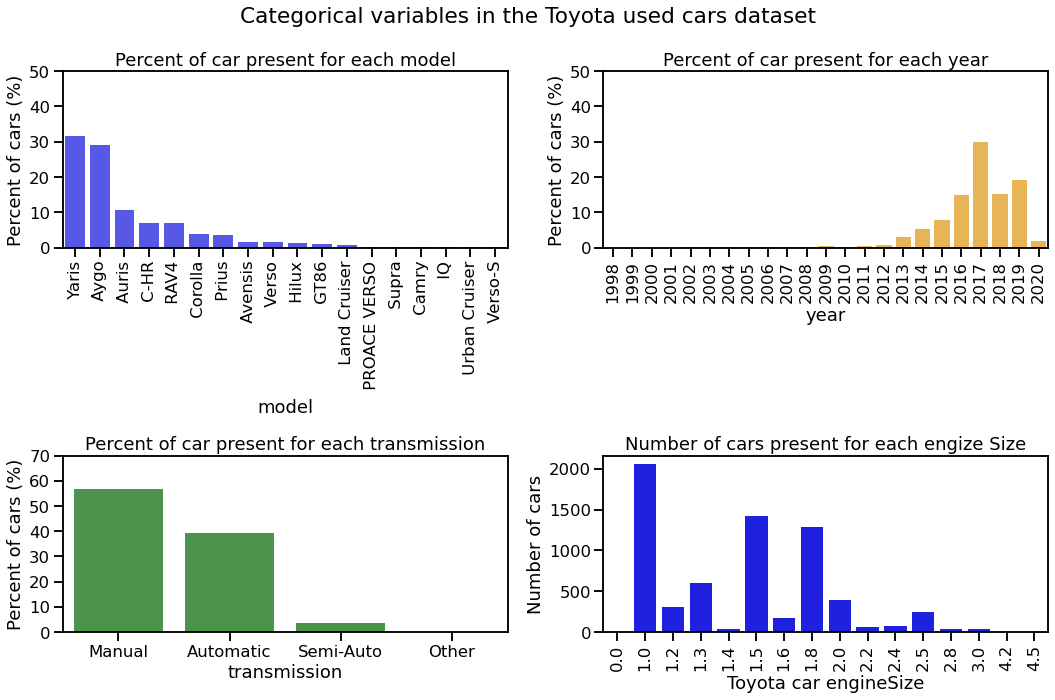

In [240]:
sns.set_context('talk')

plt.figure(figsize=(15,10))

# row 1, column 1
plt.subplot(2,2,1)
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

# row 1, column 2
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

# row 2, column 1
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

# row 2, column 2
plt.subplot(2,2,4)
sns.barplot(x='engineSize', y='No_of_cars', data=engineSize_count, color='blue', alpha=1)
plt.title("Number of cars present for each engize Size")
plt.xlabel("Toyota car engineSize")
plt.ylabel("Number of cars")
plt.xticks(rotation=90)

plt.suptitle("Categorical variables in the Toyota used cars dataset")

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()